# Neural Network Classification

**Binary Classification**: One or another 

**Multiclass Classification**: More than one thing or another

**Multilabel Classification**: Multiple labels options per sample

### Image data as tensors
[batch_size, width, height, colour_channels(rgb)]

Shape = [None, 224, 224, 3]
or
Shape = [32, 224, 224, 3]

### Model Architecture
| Hyperparameter | Binary Classification | Multiclass Classification | Multilabel Classification |
|:--------------:|:---------------------:|:-------------------------:|:-------------------------:|
| <span style="color: lightblue;">Input Layer shape</span> | Same shape as number of features | Same as Binary Classification | Same as Binary Classification |
| <span style="color: aqua;">Hidden Layer(s)</span> | Problem specific, minimum = 1 maximum = n | Same as Binary Classification | Same as Binary Classification |
| <span style="color: lightgreen;">Neurons per hidden layer</span> | Problem specific, generally 10,100 | Same as Binary Classification | Same as Binary Classification |
| <span style="color: yellow;">Output Layer shape</span> | 1 (one class or the other) | 1 per class | 1 per class |
| <span style="color: red;">Hidden activation</span> | Usually ReLU (rectified linear unit) | Same as Binary Classification | Same as Binary Classification |
| <span style="color: orange;">Output activation</span> | Sigmoid | Softmax | Softmax |
| <span style="color: pink;">Loss function</span> | Cross entropy | Same as Binary Classification | Same as Binary Classification |
| <span style="color: lavender;">Optimizer</span> | SGD(stochastic gradient descent), Adams | Same as Binary Classification | Same as Binary Classification |

model = tf.keras.Sequential\(\[
    </br>
    &emsp;<span style="color: lightblue;">tf.keras.Input(shape=(224, 224, 3))</span>,</br>
    &emsp;<span style="color: aqua;">tf.keras.layers.Dense(<span style="color: lightgreen;">100</span>, <span style="color: red;">activation="relu"</span>)</span>,</br>
    &emsp;<span style="color: aqua;">tf.keras.layers.Dense(<span style="color: lightgreen;">100</span>, <span style="color: red;">activation="relu"</span>)</span>,</br>
    &emsp;tf.keras.layers.Dense(<span style="color: yellow;">3</span>, <span style="color: orange;">activation="sefotmax"</span>)</br>
\]\)

model.compile\(</br>
&emsp;<span style="color: pink;">loss=tf.keras.losses.mae</span>,</br>
&emsp;<span style="color: lavender;">optimizer=tf.keras.optimizers.Adam</span>(lr=0.0001),</br>
&emsp;metrics=["mae"]</br>
\)

model.fit\(X_train, Y_train, epochs=100\)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### Creating data to view and fit Binary Classification

In [16]:
from sklearn.datasets import make_circles

# Make 1000 examples of circles
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

### Visualize the data

In [11]:
X, y

(array([[ 0.71210844,  0.28469831],
        [-0.67871584,  0.20727355],
        [-0.86602567,  0.34365139],
        ...,
        [-0.10655608, -0.86643656],
        [ 0.63726196, -0.85741166],
        [ 0.27181056,  0.97619727]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [12]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "y": y})
circles

,X0,X1,y
0,0.712108,0.284698,1
1,-0.678716,0.207274,1
2,-0.866026,0.343651,1
3,-0.517648,0.620599,1
4,0.454089,-0.890466,0
...,...,...,...
995,0.261683,0.879943,0
996,-1.002156,-0.327634,0
997,-0.106556,-0.866437,1
998,0.637262,-0.857412,0


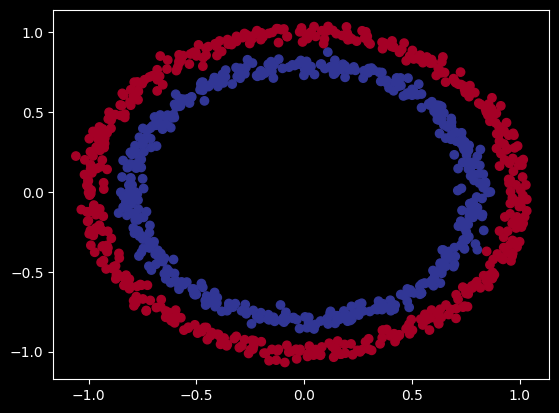

In [17]:
plt.scatter(X[: , 0], X[: , 1], c=y, cmap=plt.cm.RdYlBu)

In [18]:
X.shape, y.shape

((1000, 2), (1000,))

### Creating a Binary Classification Model

In [20]:
tf.random.set_seed(42)
bc_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bc_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

bc_model.fit(X, y, epochs=5, verbose=0)

In [21]:
bc_model.evaluate(X, y)

32/32 [==============================] - 0s 688us/step - loss: 0.7190 - accuracy: 0.4970


[0.7189580798149109, 0.4970000088214874]

In [22]:
# Try to Imporve Model by training for longer
bc_model.fit(X, y, epochs=200, verbose=0)
bc_model.evaluate(X, y)

32/32 [==============================] - 0s 611us/step - loss: 0.6931 - accuracy: 0.4750


[0.6931481957435608, 0.4749999940395355]

Since we are working on a binary classification and our model is getting around 50% its acting like it is guessing

In [24]:
# Try to imporve the model by adding a hidden layer
bc_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
bc_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
bc_model.fit(X, y, epochs=200, verbose=0)
bc_model.evaluate(X, y)

32/32 [==============================] - 0s 670us/step - loss: 0.6931 - accuracy: 0.5000


[0.693148136138916, 0.5]

### WTF is wrong with the model it sucks?!

# Fixing To Model Retrospective

## IMPORTANT
Notice that we were not using a activation function. Thus, are model was still linear which works for regression since it was a linear problem, but this classification problem does not have a linear pattern. Which is why we need to introduce a activation function  **ReLU** or rectified linear unit in our hidden layers to introduce the property of none linearity. As well as the **Sigmoid** Logistic Activation Function to take any real values as input and outputs values in the range 0 to 1 in our output layer

### Formulas

- **ReLU**: $$\text{ReLU}(x) = \max(0, x)$$

- **Sigmoid**: $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
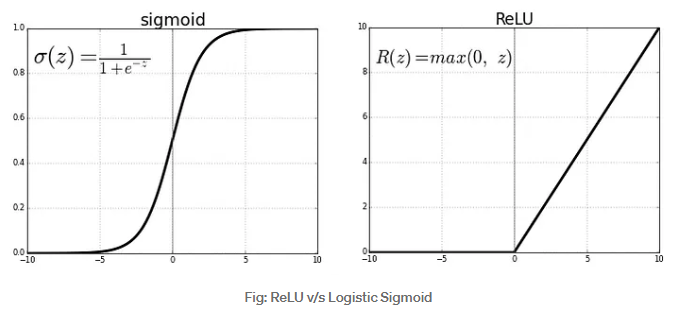

**Note**: We should be splitting our data into training and testing 

Lets look into how we can improve a binary classification model

1. Create a model - add more layers or increase the number of hidden layers
2. Compiling a model - choose a different optimizer function such as Adams instead of SGD
3. Fitting the model - fit our model with more epochs

32/32 [==============================] - 0s 707us/step - loss: 0.0012 - accuracy: 1.0000


Text(0.5, 0, 'epoch')

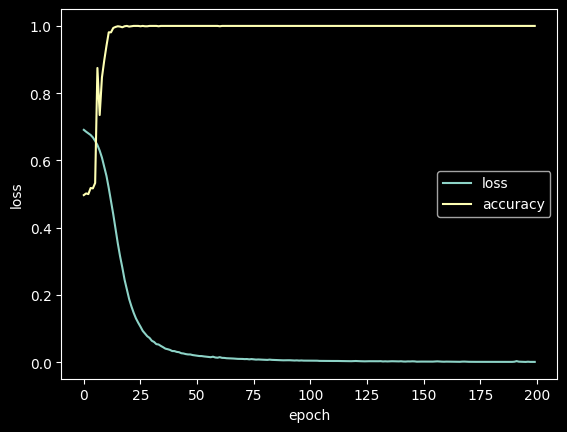

In [26]:
# Add Hidden layer, specify activation, change optimization function, and train for longer

# THE KEY TO THIS IS THE ACTIVATION FUNCTION
# A rectified linear unit (ReLU) is an activation function that introduces the property of non-linearity

tf.random.set_seed(42)
bc_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'), # hidden layer
    tf.keras.layers.Dense(10, activation='relu'), # hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bc_model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = bc_model_2.fit(X, y, epochs=200, verbose=0)
bc_model_2.evaluate(X, y)
pd.DataFrame(history.history).plot()

plt.ylabel('loss')
plt.xlabel('epoch')

To visualize our model's perdictions create a function `plot_decision_boundary()`, this function will:

- Take in a trained model, features(X) and labels (y)
- Create a meshgrid of different x values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones where each class falls

In [33]:
def plot_decision_boundary(model, X, y):
    """Plots the decision boundary cretaed by a model predicting on X"""

    # Define this axis boundaries of the plot
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    # Create a meshgrid
    # meshgrid returns coordinates for coordinate vectors
    # linspace returns evenly spaced numbers over a specified interval
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    # Create X values to feed into the model
    # ravel flattens the array
    # np.c_ is a special function that concatenates arrays along a new axis
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions for the meshgrid
    y_pred = model.predict(x_in)

    # Check for multi-class classification
    if len(y_pred[0]) > 1:
        print("Multiclass Classification")
        # Reshape the predictions
        # argmax returns the index of the maximum value
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Binary Classification")
        # Reshape the predictions
        # round returns 0 or 1
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    # contourf creates a contour plot
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.cividis)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

  1/313 [..............................] - ETA: 4s

313/313 [==============================] - 0s 587us/step
Binary Classification


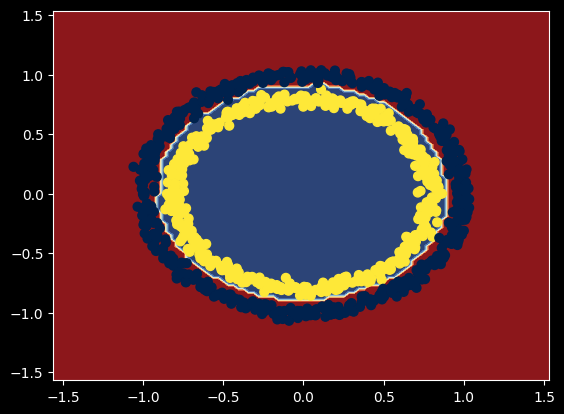

In [34]:
# Check out predictions the model is making
plot_decision_boundary(bc_model_2, X, y)

In [35]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [36]:
X.shape, y.shape

((1000, 2), (1000,))